## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Sol 
- Apellido: Mazzeo
- Legajo: 1636145

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# importamos el archivo "ClusterAI_TP_dataset_diabetes.csv" y lo guardamos en la variable "pacientes"
pacientes = pd.read_csv(r'C:\Users\Usuario\Desktop\sol\UTN\5to\cs de datos\clases\TP01\ClusterAI_TP_dataset_diabetes.csv')

In [3]:
#corroborar que lo hayamos cargado correctamente
pacientes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [4]:
# Con np.shape() nos fijamos que dimension tiene el archivo (renglones, columnas)
np.shape(pacientes)

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
# podemos acceder al listado de columnas con X.columns
# con X.isnull().sum() puedo ver la cantidad de nulos de cada columna
# Con X.info podemos ver el tipo de dato para cada una de las variables y si contienen nulos o no.
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [6]:
# Podemos ver la distribución de la variable categórica por tipo de especie  con X['Columna'].value_counts(normalize=True,dropna=False)
pacientes['Outcome'].value_counts(normalize=True,dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

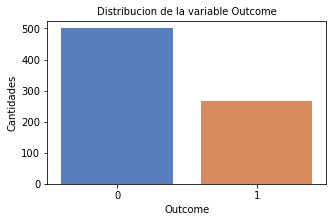

In [7]:
plt.figure(figsize=(5,3))
g = sns.countplot(data=pacientes,
                  x="Outcome",
                  palette = "muted")
plt.title('Distribucion de la variable Outcome', size = 10)
plt.xlabel("Outcome", size = 10)
plt.ylabel("Cantidades", size = 10)
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [8]:
# Con este comando obtenemos algunas estadísticas descriptivas de los datos con X.describe().T
pacientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.03, 'Pairplot')

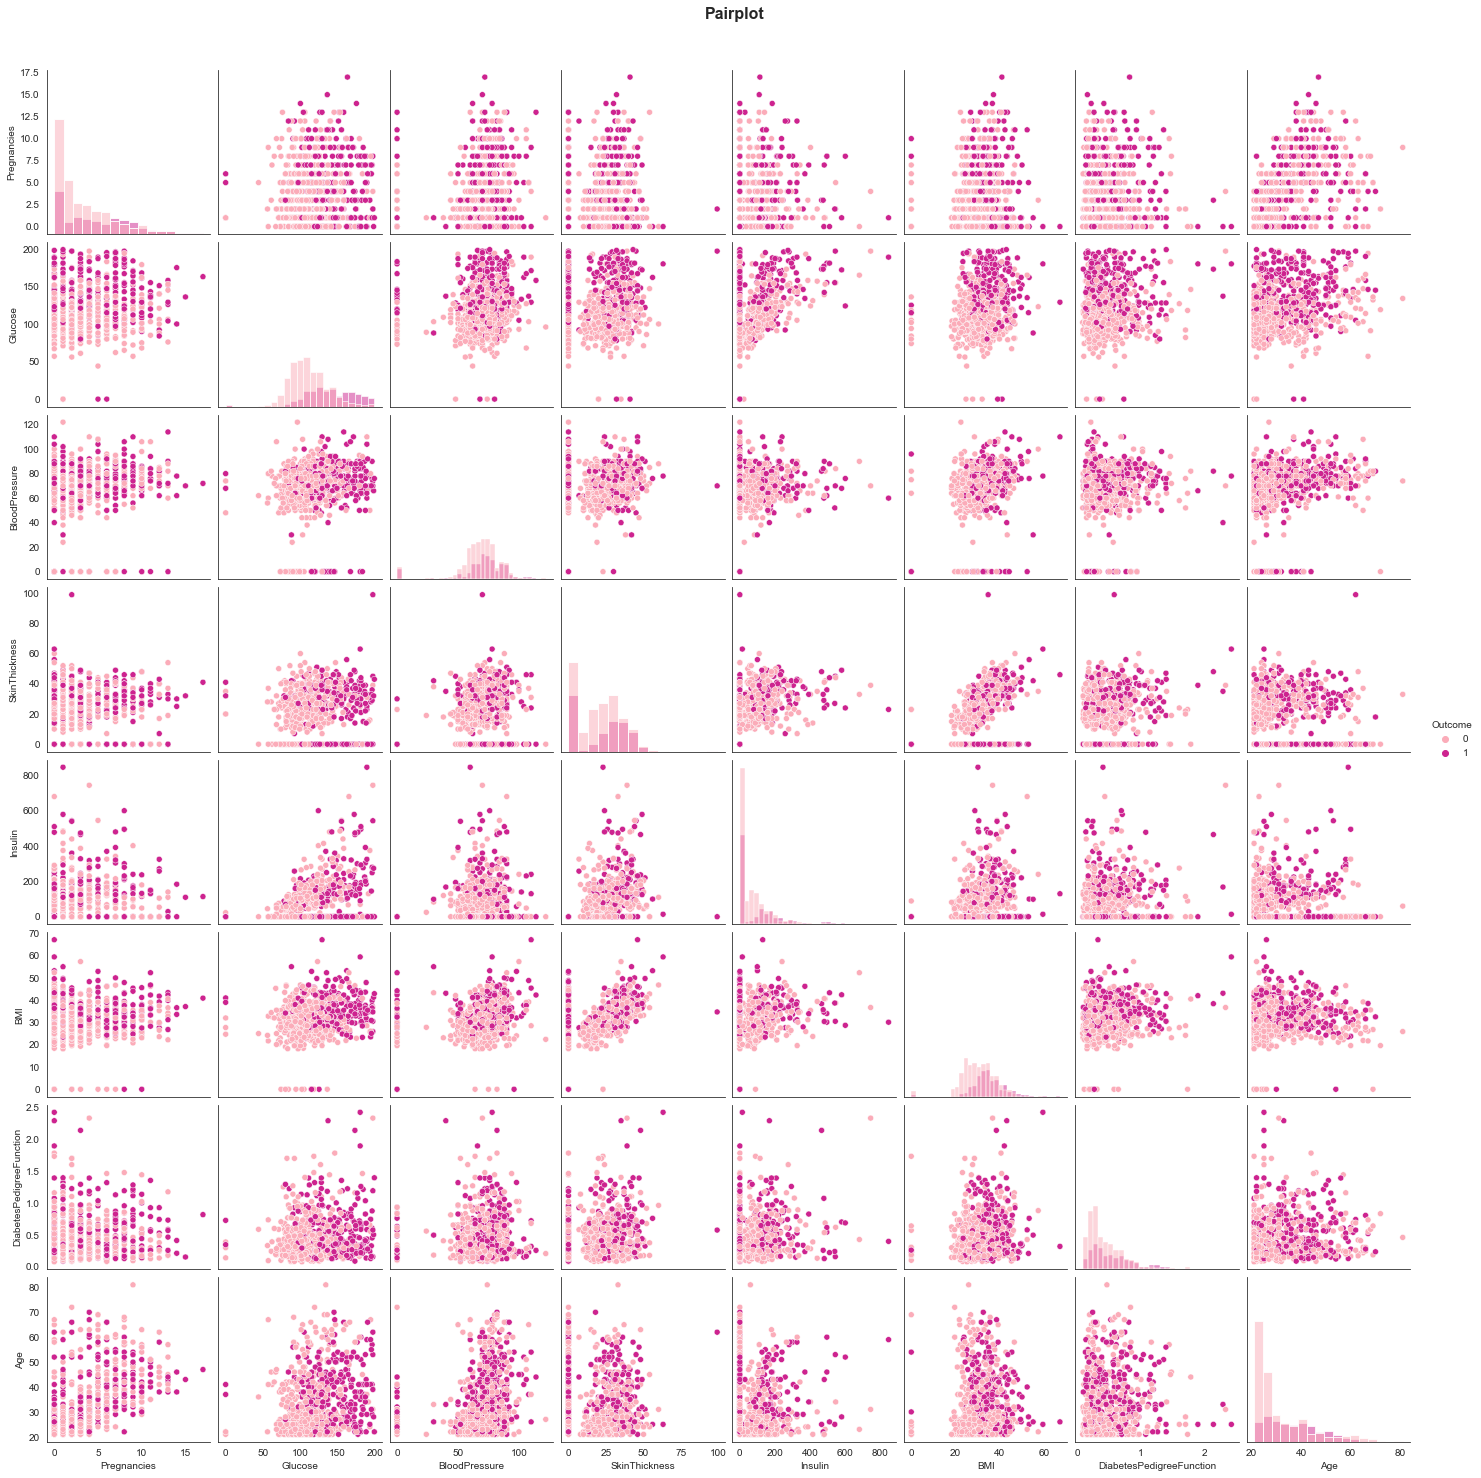

In [9]:
# Seteo de Tema
sns.set_style('white')
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creo el pairplot
pairplot = sns.pairplot(pacientes, hue = "Outcome", diag_kind = 'hist', palette = 'RdPu', vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', fontfamily = 'sans-serif')

##### **Conclusiones**
La variable que mas predice la aparición de la Diabetes es la Glucosa ya que se ven mas divididos los puntos de los pacientes con y sin diabetes dentro de todos lo graficos referidos a la glucosa

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? Cant de embarazos y edad + Glucosa y Outcome
- Que valor y tipo de correlación tienen? 0,54 y 0,44 ; correlacion positiva
- Podríamos tomar alguna decisión con respecto a esto? Cuál? Confirmando la idea anterior, la glucosa predice con mayor claridad la diabetes

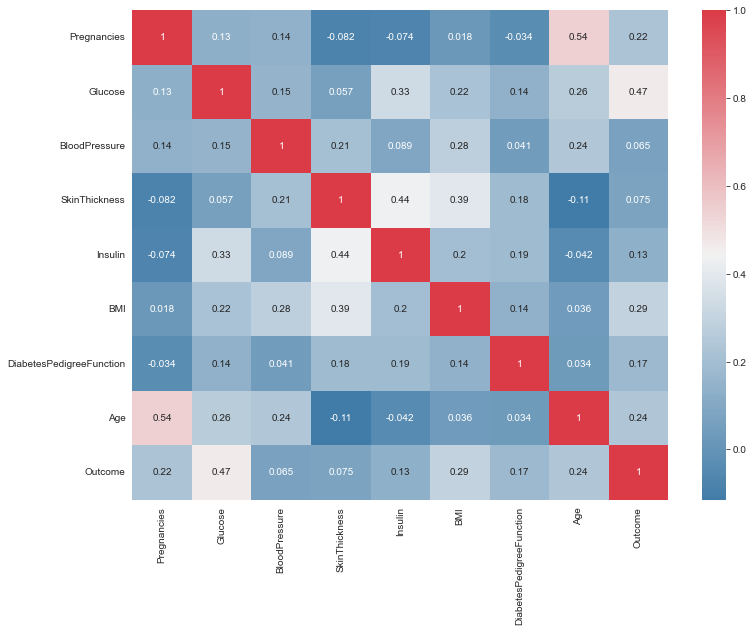

In [10]:
corrmat = pacientes.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

##### **Objetivo 8**
Hacer un histograma de la variable BMI

Text(0.5, 1.0, 'BMI')

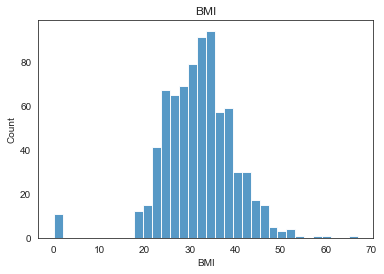

In [11]:
# Veamos la distribucion del BMI segun el Outcome
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=pacientes, x='BMI', stat='count', edgecolor=None)
ax.set_title('BMI')

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.  Si, valores cercanos a 0, ya que el indice de masa corporal no deberia ser 0

<AxesSubplot:ylabel='BMI'>

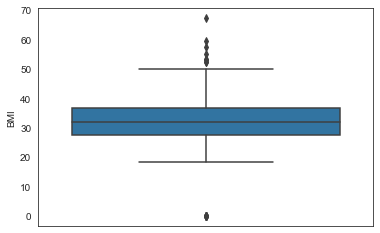

In [12]:
# Podemos ver la distribucion individuald de cada variable y a su vez sacar algunas conclusiones estadísticas
sns.boxplot(y="BMI", data=pacientes)

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [13]:
# filtrar el dataset en funcion del valor de una columna
BMI_0 = pacientes[pacientes["BMI"]>0]
BMI_0.shape

(757, 9)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar? Hay mucha diferencia en ambos boxplot, los que tienen diabetes, tienen gluscosa mas alta

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

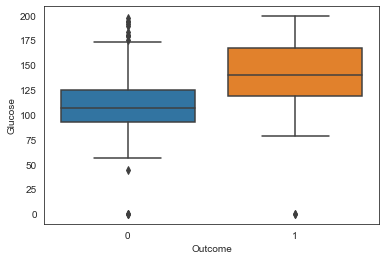

In [14]:
# Podemos ver la distribucion individuald de cada variable y a su vez sacar algunas conclusiones estadísticas
sns.boxplot(x="Outcome", y="Glucose", data=pacientes)

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál? No se relacionan directamente la glucosa con la presion, ni la presion con la diabetes, pero si se encuentran distribuidos la mayoria de los pacientes con diabetes en los niveles mas altos de glucosa

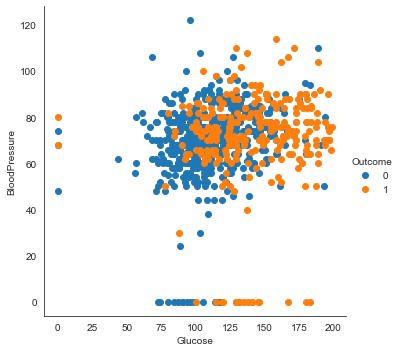

In [15]:
sns.FacetGrid(pacientes, hue="Outcome", height=5) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend()

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [16]:
# filtrar el dataset en funcion del valor de una columna
pacientes.loc[pacientes['Age'] < 30, 'RangoEdad'] = 'Menor a 30 años'
pacientes.loc[(pacientes['Age'] >= 30) & (pacientes['Age'] <= 40), 'RangoEdad']   = 'Entre 30 y 40 años'
pacientes.loc[(pacientes['Age'] > 40),'RangoEdad'] = 'Mayor a 40 años'

In [17]:
pacientes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoEdad
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál? Sí, los jovenes en su mayoria no poseen diabetes,  mientras que superando los 30 años ya comienza a verse una tendencia hacia mayores indices dee diabetes.

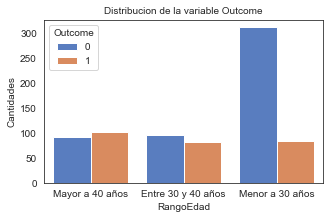

In [18]:
plt.figure(figsize=(5,3))
g = sns.countplot(data=pacientes,
                  x="RangoEdad",
                  palette = "muted",
                 hue = "Outcome")
plt.title('Distribucion de la variable Outcome', size = 10)
plt.xlabel("RangoEdad", size = 10)
plt.ylabel("Cantidades", size = 10)
plt.show()